In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [26]:
!pip install sklearn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\sheik\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
df= pd.read_csv("csv/advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## SInce we have target variable which we wont predict with example, so it is a supervised learning model


# Step 1 : Split our data into train and test sets

In [4]:
df_train,df_test=train_test_split(df,test_size=0.3)

In [6]:
df_train.shape

(140, 4)

In [7]:
df_test.shape

(60, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

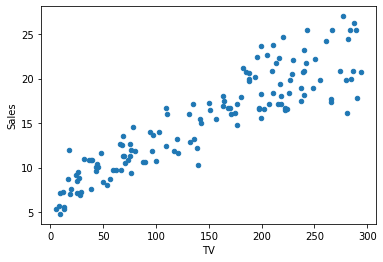

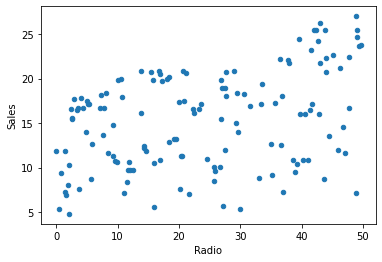

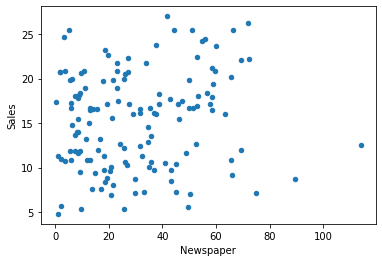

In [11]:
df_train[['TV','Sales']].plot.scatter(x='TV',y='Sales')
df_train[['Radio','Sales']].plot.scatter(x='Radio',y='Sales')
df_train[['Newspaper','Sales']].plot.scatter(x='Newspaper',y='Sales')



In [8]:
model=LinearRegression()

In [13]:
model= model.fit(df_train[['TV','Radio','Newspaper']],df_train['Sales'])

In [14]:
model

LinearRegression()

In [15]:
model.coef_

array([ 0.05430689,  0.11097289, -0.00135558])

In [16]:
model.intercept_

4.785657052453777

In [17]:
model.score(df_train[['TV','Radio','Newspaper']],df_train['Sales'])

0.9173040407009478

In [18]:
model.score(df_test[['TV','Radio','Newspaper']],df_test['Sales'])

0.855424677567805

In [19]:
model.feature_names_in_

array(['TV', 'Radio', 'Newspaper'], dtype=object)

In [21]:
test_predicted_sales= model.predict(df_test[['TV','Radio','Newspaper']])

In [24]:
test_predicted_sales

array([19.42491075, 13.03215389, 19.08692317, 16.91813833, 19.13086069,
       20.37876738, 15.9332873 , 21.11155732,  7.58454754,  6.28787401,
       24.77375809, 11.8674504 ,  9.69684264, 10.07620125, 14.47311584,
       21.59935244, 19.10327419, 10.19007903, 20.03548498,  9.90105049,
       19.45834539, 14.86474935,  7.11224731,  9.45750375, 14.64393817,
       11.90843406, 12.15706207, 18.32395481, 11.05207162, 23.77411792,
       16.03310741, 16.12058919, 12.60356253, 15.29368843, 12.61023316,
        9.2064047 , 20.73292936, 11.59964687, 21.30792816, 20.39325053,
       21.52074469, 17.34374043, 12.79550819, 18.50002819, 15.59957114,
       22.22654354, 17.78297819, 18.33286043, 15.41142296,  8.24431446,
       14.26249264, 12.40308489, 13.94588734, 18.21341811, 12.31126475,
       17.12760961,  6.13188809, 13.34575709, 20.89180182, 11.51635803])

In [22]:
test_actual_sales= df_test['Sales'].values

In [23]:
test_actual_sales

array([17. , 10.1, 17. , 17.9, 19.2, 19.6, 16.4, 22.6,  6.6,  3.2, 23.8,
       11.8, 12. , 11.9, 14.2, 20.2, 17.4, 13.2, 16.8,  8. , 19. , 17.6,
        6.7,  6.6, 15.3, 11. , 11.5, 17.3, 10.4, 21.4, 17.1, 16.4, 10.3,
       15.2, 14. ,  1.6, 19.7, 12.3, 21.5, 20.1, 20.7, 15. , 11.9, 19.6,
       15.9, 20.2, 16.9, 18.4, 14.6,  5.5, 14.7, 11. , 13.4, 17.3, 12.9,
       20.5,  5.9, 13.3, 17.6, 11.8])

In [34]:
mean_squared_error(test_actual_sales,test_predicted_sales)

3.519405105929279

In [35]:
mean_squared_error(test_actual_sales,test_predicted_sales,squared=False) #Root mean error

1.876007757427799

In [40]:
mean_absolute_error(test_actual_sales,test_predicted_sales)

1.379866362895447